In [1]:
import pytesseract
from PIL import Image
import cv2
import os,argparse
import matplotlib.pyplot as plt
import re
import ftfy
import sys
import json
import io

In [2]:
# read the images with text
folder_dir = r"C:\Users\VSK\Downloads\OCR\Images"

for images in os.listdir(folder_dir):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        print(images)

test1.jpg
test2.jpeg
test3.jpeg


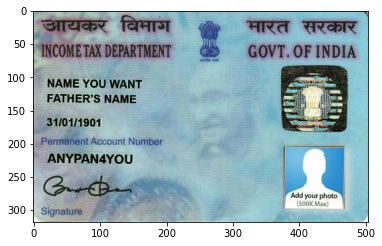

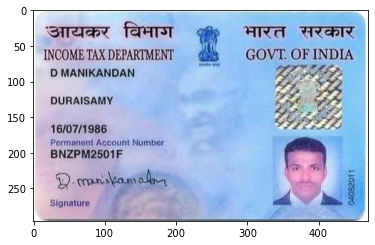

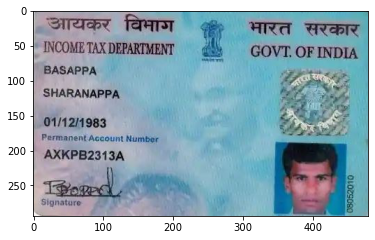

[array([[[234, 240, 238],
         [225, 234, 231],
         [218, 229, 225],
         ...,
         [201, 208, 192],
         [209, 215, 203],
         [209, 221, 209]],
 
        [[227, 237, 236],
         [221, 231, 232],
         [209, 219, 218],
         ...,
         [187, 197, 172],
         [202, 211, 192],
         [202, 218, 207]],
 
        [[222, 233, 229],
         [218, 229, 233],
         [199, 214, 217],
         ...,
         [144, 168, 155],
         [172, 185, 178],
         [200, 212, 200]],
 
        ...,
 
        [[245, 249, 248],
         [248, 249, 251],
         [247, 248, 250],
         ...,
         [241, 248, 254],
         [243, 248, 251],
         [243, 247, 246]],
 
        [[241, 243, 242],
         [243, 243, 243],
         [249, 247, 248],
         ...,
         [245, 250, 246],
         [241, 247, 243],
         [243, 249, 247]],
 
        [[241, 240, 238],
         [244, 242, 243],
         [245, 243, 244],
         ...,
         [249, 249, 251],
  

In [3]:
# read the images with text
images = []
def load_images(folder):
    for filename in os.listdir(folder):
        try:
            img = plt.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                plt.imshow(img)
                plt.show()
                
        except:
            print("Cant import " + filename)
    return images

load_images(folder_dir)

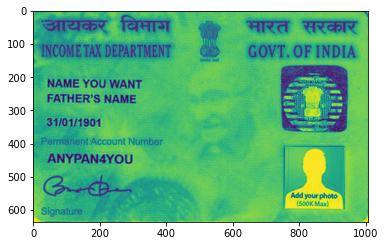

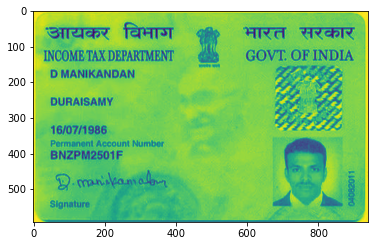

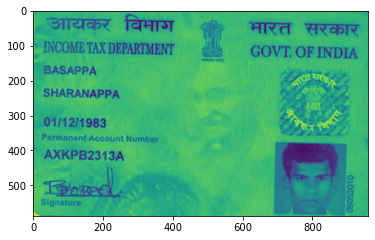

In [4]:
# resize the images
def resize_imgs():
    for img in images:
        img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        # convert to grayscale image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.show()
        
resize_imgs()

In [5]:
# Defining path to tesseract.exe and the image
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = path_to_tesseract

In [6]:
# Extract the text from the images
path_to_images = r"C:\Users\VSK\Downloads\OCR\Images"
output_file = r"C:\Users\VSK\Downloads\OCR\output.txt"


def convert_to_text():
    # Iterating the images inside the folder
    for imageName in os.listdir(path_to_images):
        inputPath = os.path.join(path_to_images, imageName)
        img = Image.open(inputPath)
        
        # Extract text from image
        text = pytesseract.image_to_string(img, lang ="eng")
        
        # Write to a .txt file
        text_output = open(output_file, "a+")
        # providing the name of the image
        text_output.write(imageName + "\n")
        # providing the content in the image
        text_output.write(text + "\n")
        text_output.close()
        
        # Read the .txt file
        file = open(output_file, 'r')
        text = file.read()
        file.close()
        
        text = ftfy.fix_text(text)
        text = ftfy.fix_encoding(text)
        
convert_to_text()

In [7]:
def adhaar_read_data(text):
    res = text.split()
    name = None
    dob = None
    adh = None
    sex = None
    nameline = []
    dobline = []
    text0 = []
    text1 = []
    text2 = []
    lines = text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = lin.replace('\n','')
        s = s.rstrip()
        s = s.lstrip()
        text1.append(s)
    
    if 'female' in text.lower():
        sex = "FEMALE"
    else:
        sex = "MALE"
    
    text1 = list(filter(None, text1))
    text0 = text1[:]
    
    try:
        # Cleaning first names
        name = text0[0]
        name = name.rstrip()
        name = name.lstrip()
        name = name.replace("8", "B")
        name = name.replace("0", "D")
        name = name.replace("6", "G")
        name = name.replace("1", "I")
        name = re.sub('[^a-zA-Z] +', ' ', name)
        
        # Cleaning DOB
        dob = text0[1][-10:]
        dob = dob.rstrip()
        dob = dob.lstrip()
        dob = dob.replace('l', '/')
        dob = dob.replace('L', '/')
        dob = dob.replace('I', '/')
        dob = dob.replace('i', '/')
        dob = dob.replace('|', '/')
        dob = dob.replace('\"', '/1')
        dob = dob.replace(":","")
        dob = dob.replace(" ", "")
        
        # Cleaning Aadhaar number details
        aadhar_number=''
        for word in res:
            if len(word) == 4 and word.isdigit():
                aadhar_number=aadhar_number  + word + ' '
        if len(aadhar_number)>=12:
            print("Aadhar number: " + aadhar_number)
        else:
            print("Aadhar number cannot be read!")
        adh = aadhar_number
        
    except:
        pass
    
    data = {}
    data['Name'] = name
    data['Date of Birth'] = dob
    data['Adhaar Number'] = adh
    data['Sex'] = sex
    data['ID Type'] = "Adhaar"
    return data

In [8]:
def pan_read_data(text):
    name = None
    fname = None
    dob = None
    pan = None
    nameline = []
    dobline = []
    panline = []
    text0 = []
    text1 = []
    text2 = []
    lines = text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = lin.replace('\n','')
        s = s.rstrip()
        s = s.lstrip()
        text1.append(s)
    
    text1 = list(filter(None, text1))
    lineno = 0
    
    for wordline in text1:
        xx = wordline.split('\n')
        if ([w for w in xx if re.search('(INCOMETAXDEPARWENT|INCOME|TAX|GOW|GOVT|GOVERNMENT|OVERNMENT|VERNMENT|DEPARTMENT|EPARTMENT|PARTMENT|ARTMENT|INDIA|NDIA)$', w)]):
            text1 = list(text1)
            lineno = text1.index(wordline)
            break
    text0 = text1[lineno+1:]
    
    try:
        # Cleaning first names
        name = text0[0]
        name = name.rstrip()
        name = name.lstrip()
        name = name.replace("8", "B")
        name = name.replace("0", "D")
        name = name.replace("6", "G")
        name = name.replace("1", "I")
        name = re.sub('[^a-zA-Z] +', ' ', name)
        
        # Cleaning Father's name
        fname = text0[1]
        fname = fname.rstrip()
        fname = fname.lstrip()
        fname = fname.replace("8", "S")
        fname = fname.replace("0", "O")
        fname = fname.replace("6", "G")
        fname = fname.replace("1", "I")
        fname = fname.replace("\"", "A")
        fname = re.sub('[^a-zA-Z] +', ' ', fname)
        
        # Cleaning DOB
        dob = text0[2][:10]
        dob = dob.rstrip()
        dob = dob.lstrip()
        dob = dob.replace('l', '/')
        dob = dob.replace('L', '/')
        dob = dob.replace('I', '/')
        dob = dob.replace('i', '/')
        dob = dob.replace('|', '/')
        dob = dob.replace('\"', '/1')
        dob = dob.replace(" ", "")
        
        # Cleaning PAN Card details
        text0 = findword(text1, '(Pormanam|Number|umber|Account|ccount|count|Permanent|ermanent|manent|wumm)$')
        panline = text0[0]
        pan = panline.rstrip()
        pan = pan.lstrip()
        pan = pan.replace(" ", "")
        pan = pan.replace("\"", "")
        pan = pan.replace(";", "")
        pan = pan.replace("%", "L")
    
    except:
        pass
    
    data = {}
    data['Name'] = name
    data['Father Name'] = fname
    data['Date of Birth'] = dob
    data['PAN'] = pan
    data['ID Type'] = "PAN"
    return data

In [9]:
# Using regex to find the neceesary information
def findword(textlist, wordstring):
    lineno = -1
    for wordline in textlist:
        xx = wordline.split( )
        if ([w for w in xx if re.search(wordstring, w)]):
            lineno = textlist.index(wordline)
            textlist = textlist[lineno+1:]
            return textlist
    return textlist

In [11]:
def extract_data():
    # Iterating the images inside the folder
    for imageName in os.listdir(path_to_images):
        inputPath = os.path.join(path_to_images, imageName)
        img = Image.open(inputPath)
        
        # Extract text from image
        text = pytesseract.image_to_string(img, lang ="eng")
        
        # Read the Aadhar and PAN number
        if "male" in text.lower():
            print("-----------------Aadhar details-----------------------")
            data = adhaar_read_data(text)
            
        elif "income" in text.lower() or "tax" in text.lower() or "department" in text.lower():
            print("-----------------Pan details------------------")
            data = pan_read_data(text)
        
        # Write to a jSON file
        with io.open(r'C:\Users\VSK\Downloads\OCR\json\pan.json', 'w', encoding='utf-8') as outfile:
            data = json.dumps(data, indent=4, sort_keys=True, separators=(',', ': '))
            outfile.write(data)
            
        # Read from the JSON file
        with open(r'C:\Users\VSK\Downloads\OCR\json\pan.json', encoding = 'utf-8') as data:
            json_data = json.load(data)
        
        # Extract the data from JSON file
        if json_data['ID Type'] == 'Adhaar':
            print("Name: ", json_data['Name'])
            print("Date Of Birth: ", json_data['Date of Birth'])
            print("Sex: ", json_data['Sex'])
            
        elif json_data['ID Type'] == 'PAN':
            print("PAN Number: ", json_data['PAN'])
            print("Name: ", json_data['Name'])
            print("Father's Name: ", json_data['Father Name'])
            print("Date Of Birth: ", json_data['Date of Birth'])

extract_data()

-----------------Pan details------------------


AttributeError: '_io.TextIOWrapper' object has no attribute 'update'